In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pandas import to_datetime

In [2]:
save=True
savename='profiles_analyticalOnly'

In [3]:
T0 = -5 # K
slope = 3*np.pi/180. # rad
Tref = 308 # K
lapse = 0.02 # K/m
Km = 0.012 # m^2 / s
Kh = 0.02 # m^2 / s
g = 9.8 # m / s^2

In [4]:
ztop = 50 # [m a.s.l.]
n = np.linspace(0,ztop,100)

In [5]:
sigma = ( g*lapse*np.sin(slope)**2 / (4*Tref*Km*Kh) )**0.25
mu = ( g*Kh / (Tref*lapse*Km) )**0.5
u_Prandtl = -T0*mu*np.exp(-sigma*n)*np.sin(sigma*n)
T_Prandtl = T0*np.exp(-sigma*n)*np.cos(sigma*n)

In [6]:
# hfx = -0.008 # [K m/s]
# u_flux = -hfx/sigma/Kh*mu*np.exp(-sigma*n)*np.sin(sigma*n)
# T_flux = hfx/sigma/Kh*np.exp(-sigma*n)*np.cos(sigma*n)

In [7]:
from scipy.integrate import quad

def Kh_GO(n, h = 20, C = 0.008):      
    return C * n * np.exp( -0.5 * n**2 / h**2 ) 

def integrand(n):
    return Kh_GO(n)**-0.5

def integral_K(z):
    integral, _ = quad(integrand, 0, z)
    return integral

In [8]:
Pr = 0.6
sigma0 = ( g*lapse*np.sin(slope)**2 / (Tref*Pr) )**0.5
mu = ( g / (Tref*lapse*Pr) )**0.5

In [9]:
exp_arg = np.zeros( n.shape )
exp_arg[1:] = np.array([ (sigma0/2)**0.5 * integral_K(nk) for nk in n[1:] ])

In [10]:
u_GO = -T0*mu*np.exp(-1*exp_arg)*np.sin(exp_arg)
T_GO = T0*np.exp(-1*exp_arg)*np.cos(exp_arg)

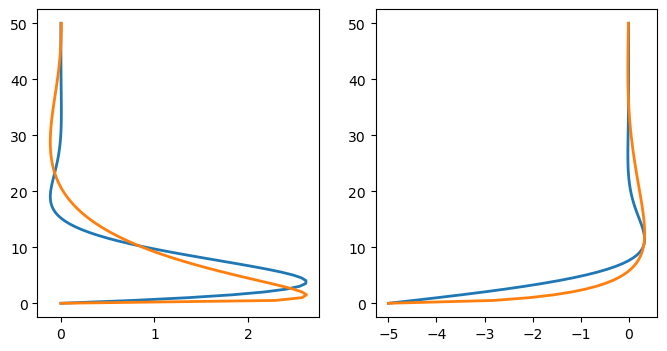

In [11]:
try:
    del(fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots( 1, 2, figsize=(8, 4) )
except:
    fig, axs = plt.subplots( 1, 2, figsize=(8, 4) )

axs[0].plot( u_Prandtl, n, label = 'Prandtl' , linewidth=2)
axs[1].plot( T_Prandtl, n, label = 'Prandtl' , linewidth=2)

axs[0].plot( u_GO, n, label = 'GO', linewidth=2)
axs[1].plot( T_GO, n, label = 'GO' , linewidth=2)

# axs[0].plot( u_flux*np.cos(slope), n*np.cos(slope), label = 'flux-Pr')
# axs[1].plot( T_flux*np.cos(slope), n*np.cos(slope), label = 'flux-Pr' )

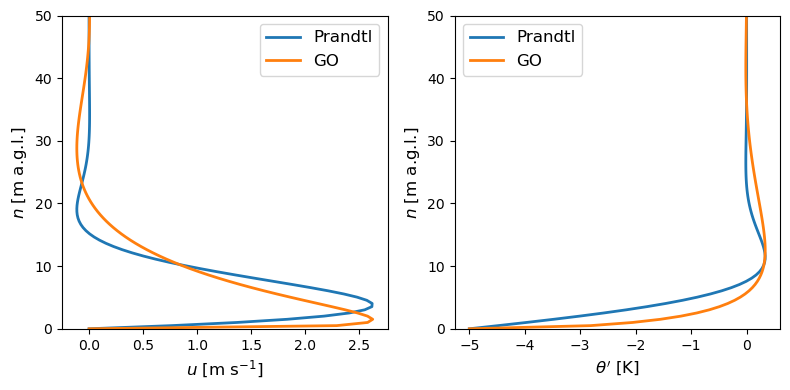

In [12]:
for ax in axs:
    ax.set_ylim( (-.1, ztop) )
    ax.legend(fontsize=12)
axs[0].set_ylabel(r"$n$ [m a.g.l.]",size=12)
axs[0].set_xlabel(r'$u$ [m s$^{-1}$]',size=12)
axs[1].set_ylabel(r"$n$ [m a.g.l.]",size=12)
axs[1].set_xlabel(r"$\theta'$ [K]",size=12) 
# axs[1].set_xlabel(r"$\theta$ [K]")  
fig.tight_layout() 
fig

In [13]:
if save:
    plt.figure(fig)
    fmts=["png","eps"]
    for fmt in fmts:
        plt.savefig("plots/"+savename+"."+fmt, format=fmt)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
